# Zomato Analysis

### importing the libraries

In [68]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

## Code for Suppressing Warnings

In [69]:
import warnings
warnings.filterwarnings('ignore')

## Data Loading from CSV File

In [70]:
data=pd.read_csv('zomato.csv',encoding='unicode_escape')

## Initial Top 5 Data Preview

In [71]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Columns Overview

In [72]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## Removing Unnecessary Columns

In [73]:
data = data.drop(['url','address','phone','menu_item',
                  'listed_in(type)','listed_in(city)'],axis=1)

## After Removing Unnecessary Columns

In [74]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


## Dataset Shape Information Row AND Columns

In [75]:
data.shape

(51717, 11)

## Missing Data Analysis 

In [76]:
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
dtype: int64

# Features with Missing Data Cleaning

In [77]:
feature_na = [i for i in data.columns if data[i].isnull().sum() > 0]
feature_na

['rate',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

## Percentage of Null Values for Features with Missing Data

In [78]:
for i in feature_na:
    print(f"{i} has {np.round((data[i].isnull().sum() / len(data[i])) * 100, 4)}% null values")

rate has 15.0337% null values
location has 0.0406% null values
rest_type has 0.4389% null values
dish_liked has 54.2916% null values
cuisines has 0.087% null values
approx_cost(for two people) has 0.669% null values


## Unique Values in the 'Rate' Column

In [79]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## Removing Rows with Missing 'Rate' Data

In [80]:
data.dropna(subset=['rate'],axis=0,inplace=True)

## Custom Data Splitting Function

In [81]:
def split(x):
    return x.split('/')[0].strip()

## Applying Custom Data Splitting to 'Rate' Column

In [82]:
data['rate'] = data['rate'].apply(split)

## 'Rate' Column After Data Splitting

In [83]:
data['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 43942, dtype: object

## Unique Values in the 'Rate' Column

In [84]:
data.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '-',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

## "Replacing Values in the 'rate' Column"

In [85]:
data['rate'].replace(['NEW','-'],0,inplace=True)

In [86]:
data.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

## Dataset Information Summary

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43942 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43942 non-null  object
 1   online_order                 43942 non-null  object
 2   book_table                   43942 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        43942 non-null  int64 
 5   location                     43942 non-null  object
 6   rest_type                    43791 non-null  object
 7   dish_liked                   23609 non-null  object
 8   cuisines                     43931 non-null  object
 9   approx_cost(for two people)  43690 non-null  object
 10  reviews_list                 43942 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


## Converting 'Rate' Column to Float

In [88]:
data['rate'] = data['rate'].astype(float)

## After Converting 'Rate' Column to Float

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43942 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         43942 non-null  object 
 1   online_order                 43942 non-null  object 
 2   book_table                   43942 non-null  object 
 3   rate                         43942 non-null  float64
 4   votes                        43942 non-null  int64  
 5   location                     43942 non-null  object 
 6   rest_type                    43791 non-null  object 
 7   dish_liked                   23609 non-null  object 
 8   cuisines                     43931 non-null  object 
 9   approx_cost(for two people)  43690 non-null  object 
 10  reviews_list                 43942 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.0+ MB


## Calculate avg rating for each resturent

In [90]:
rating = pd.pivot_table(data,index='name',values='rate')
rating

,rate
name,
#FeelTheROLL,3.400000
#L-81 Cafe,3.900000
#refuel,3.700000
1000 B.C,3.200000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...
i-Bar - The Park Bangalore,3.800000
iFruit Live Ice Creams,3.400000
iSpice Resto Cafe,3.700000


## Top 15 Highest-Rated Restaurants

In [91]:
rating=rating.sort_values(['rate'],ascending=False)
rating[0:15]

,rate
name,
Asia Kitchen By Mainland China,4.900000
Byg Brewski Brewing Company,4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.844828
O.G. Variar & Sons,4.800000
Flechazo,4.800000
The Pizza Bakery,4.800000
AB's - Absolute Barbecues,4.789474


## Top 20 Highest-Rated Restaurants Visualization

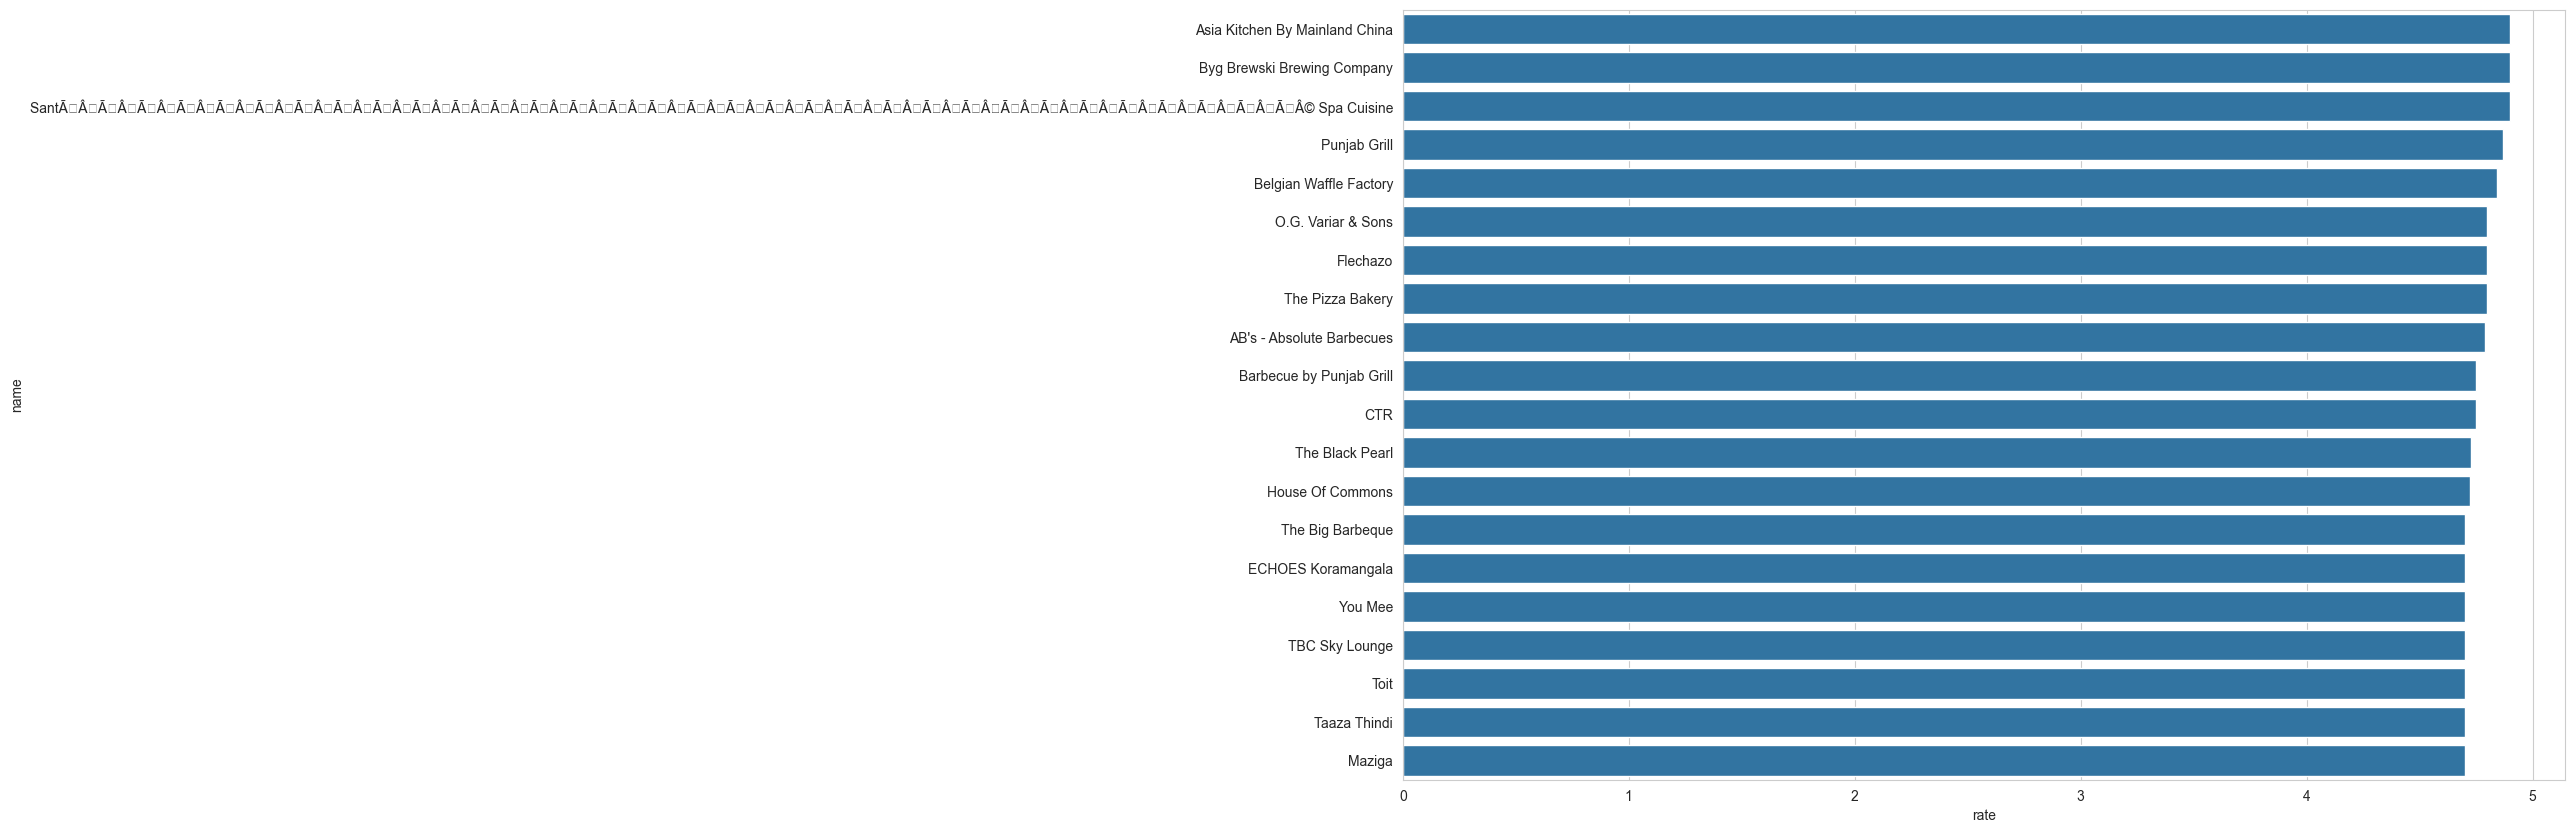

In [92]:
plt.figure(figsize=(15, 10))
sns.barplot(x=rating[0:20]['rate'], y=rating[0:20].index, orient="h")
plt.show()

# Distribution of rating

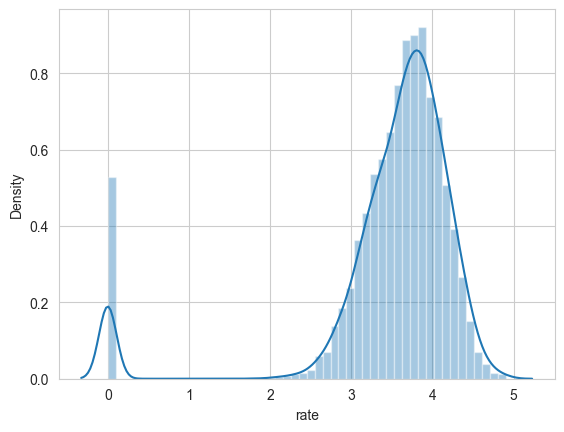

In [93]:
sns.set_style('whitegrid')
sns.distplot(data['rate'])
plt.show()

## Normality Test for 'Rate' Data

In [94]:
from scipy.stats import normaltest

DataToTest = data['rate']

stat,p = normaltest(DataToTest)

print("stat=%0.2f,p=%0.30f" % (stat,p))

if p>0.05:
    print("Normal distribution")
else:
    print("Not a normal distribution")

stat=24555.12,p=0.000000000000000000000000000000
Not a normal distribution


# Top resturent chains

In [95]:
data['name'].value_counts()

name
Cafe Coffee Day               89
Onesta                        85
Empire Restaurant             71
Just Bake                     68
Five Star Chicken             68
                              ..
SV Food Garden                 1
Ginger restaurant              1
Darjeeling Hot Momos           1
Sri Annapoorna Andhra Mess     1
SeeYa Restaurant               1
Name: count, Length: 7162, dtype: int64

## Top 15 Restaurant Chains by Number of Outlets

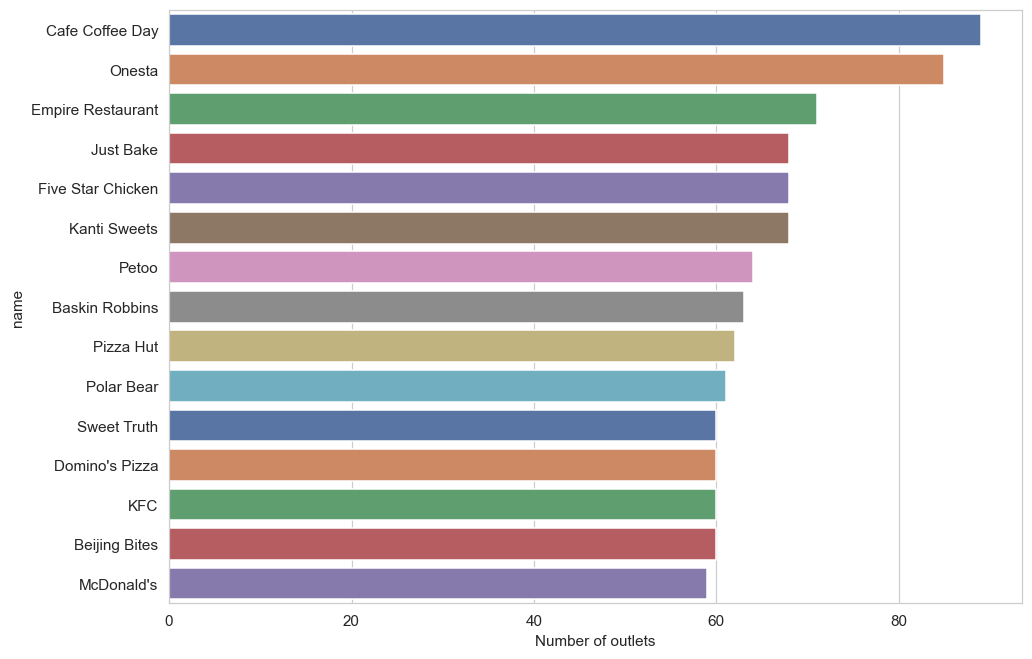

In [96]:
plt.figure(figsize=(10, 7), dpi=110)

chains = data['name'].value_counts().head(15)

sns.barplot(x=chains, y=chains.index, palette='deep')
plt.xlabel("Number of outlets")

plt.show()

## how many restaurants accept online orders

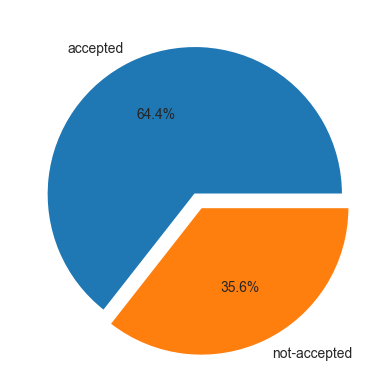

In [97]:
x = data.online_order.value_counts()
labels = ['accepted','not-accepted']
plt.pie(x,labels=labels,explode=[0.0,0.1],autopct='%1.1f%%')

plt.show()

#### we see that around 64.4% of resturants accept online orders

## How many resturants had TABLE BOOKINGS?

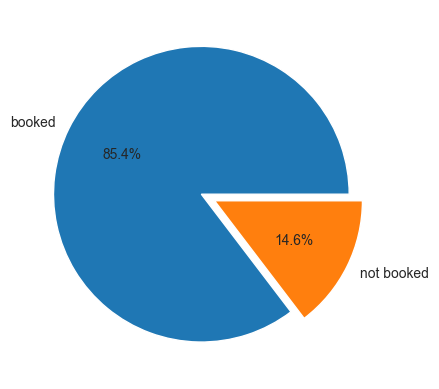

In [98]:
x = data.book_table.value_counts()
labels = ['booked','not booked']
plt.pie(x,labels=labels,explode=[0.0,0.1],autopct='%1.1f%%')

plt.show()

#### we observe that around 85,4% resturants have table bookings

## analysis on type of restaurants

In [99]:
data.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


## Unique Values in the 'Restaurant Type' Column

In [100]:
data.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

## Number of Unique Restaurant Types

In [101]:
len(data.rest_type.unique())

88

## Restaurant Type Counts

In [102]:
data.rest_type.value_counts()

rest_type
Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: count, Length: 87, dtype: int64

## Top 15 Restaurant Types by Popularity

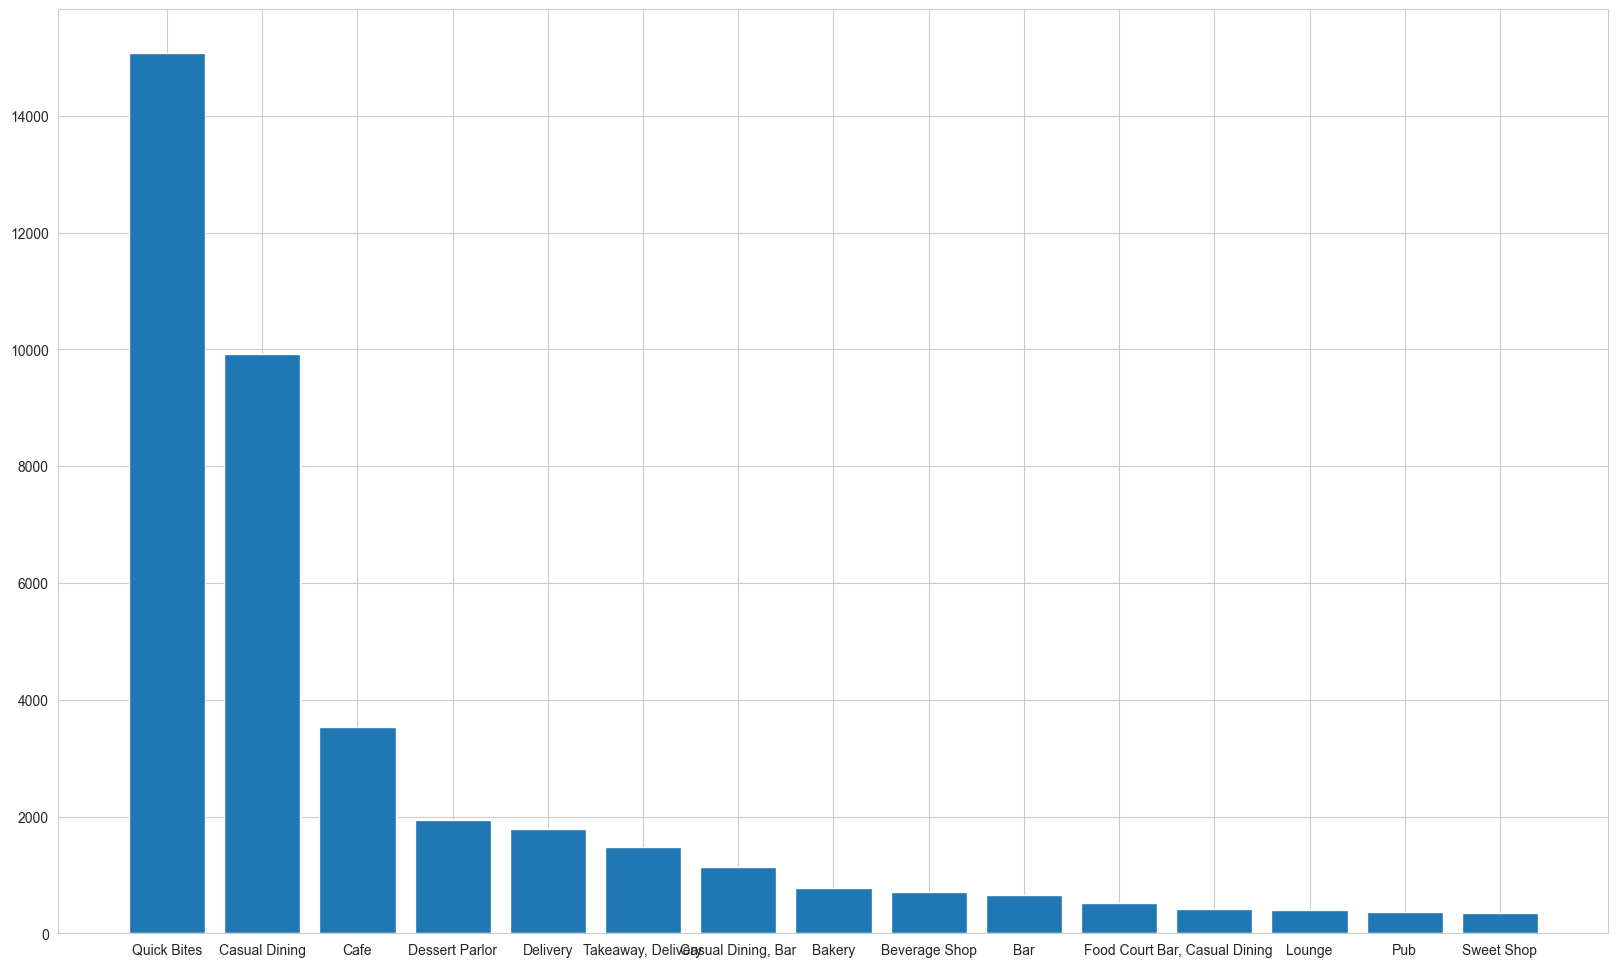

In [103]:
plt.figure(figsize=(20,12))
rest_typ = data.rest_type.value_counts()[0:15]
plt.bar(rest_typ.index,rest_typ)

plt.show()




## which restaurant had the highest voting? (means count of rating given)

In [104]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


## Average Votes per Restaurant

In [105]:
voting = data.groupby('name')[['votes']].mean()
voting

,votes
name,
#FeelTheROLL,7.000000
#L-81 Cafe,48.000000
#refuel,37.000000
1000 B.C,49.000000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,41.000000
...,...
i-Bar - The Park Bangalore,619.727273
iFruit Live Ice Creams,10.000000
iSpice Resto Cafe,30.142857


## Descriptive Statistics for Restaurant Votes

In [106]:
voting['votes'].describe()

count     7162.000000
mean       201.484245
std        607.015608
min          0.000000
25%         10.400000
50%         38.750000
75%        146.797414
max      16588.500000
Name: votes, dtype: float64

In [107]:
high_vot = voting[voting['votes'] >5000]

## Restaurants with High Votes Visualization

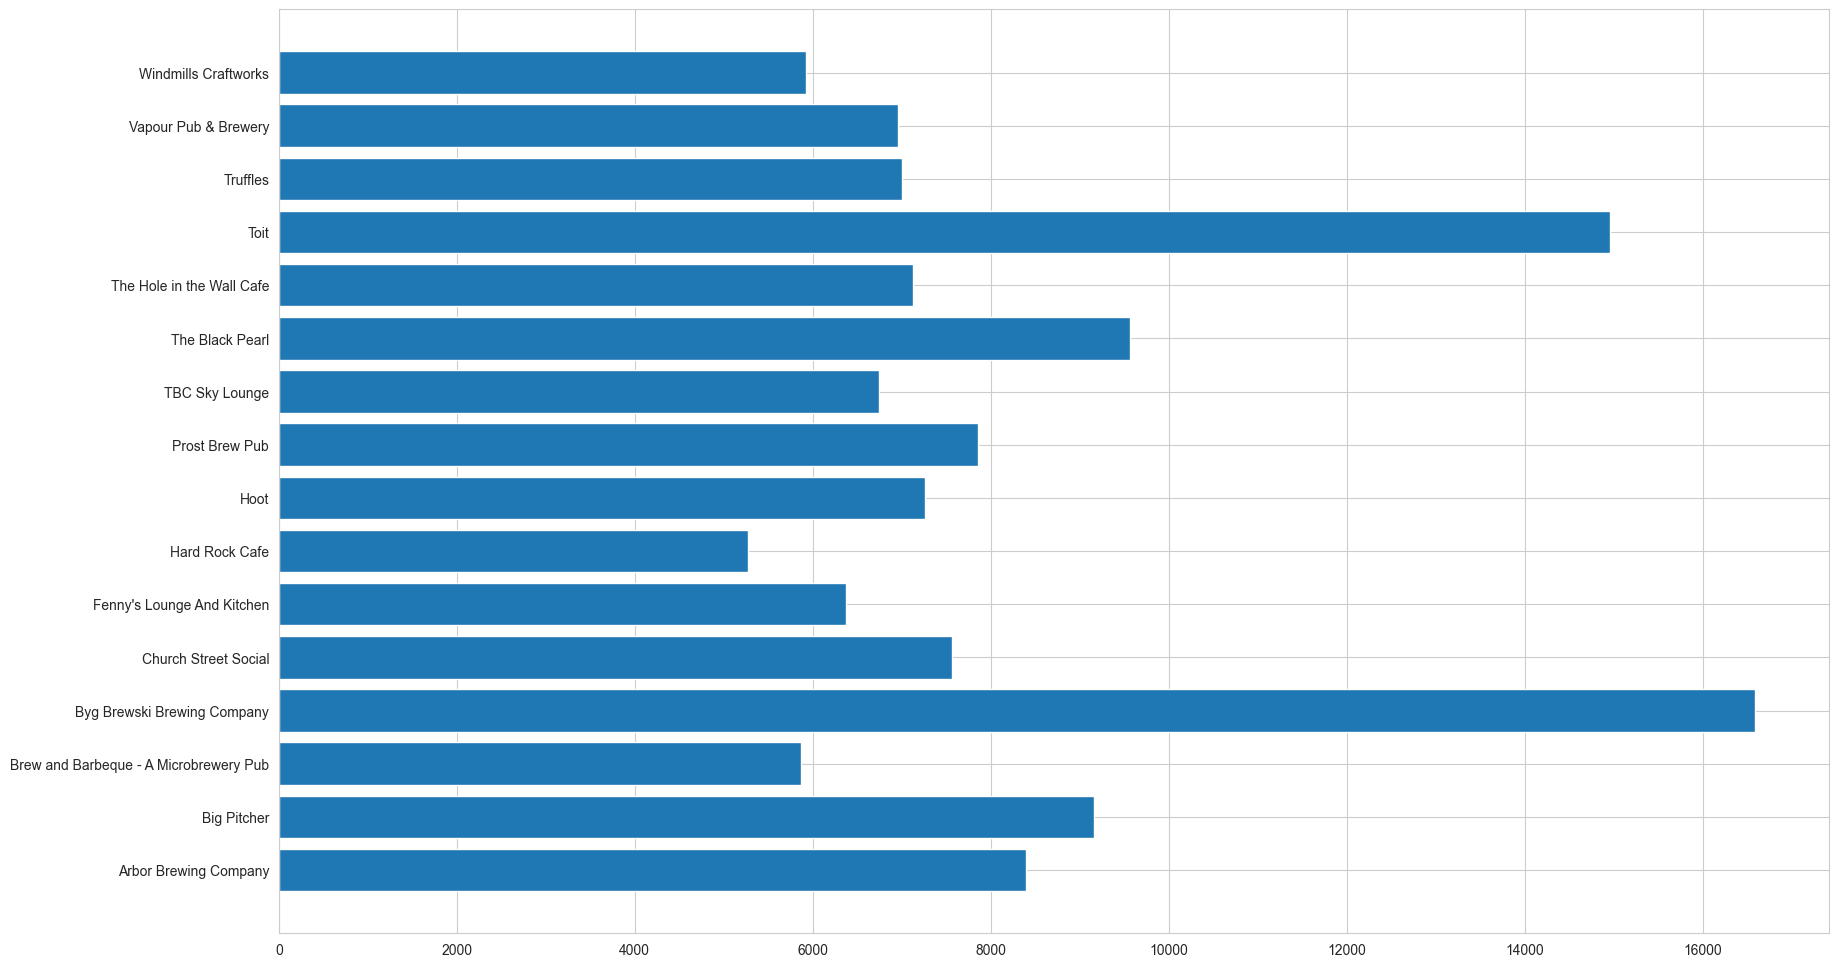

In [108]:
plt.figure(figsize=(20,12),dpi=100)

plt.barh(high_vot.index,high_vot['votes'])

plt.show()

#### This is the barplot for count of ratings given by consumers to a particular resturant

### Let's analyse the highly rated restaurants and worst restaurants based on number of ratings given

In [109]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."


## Distribution of Votes

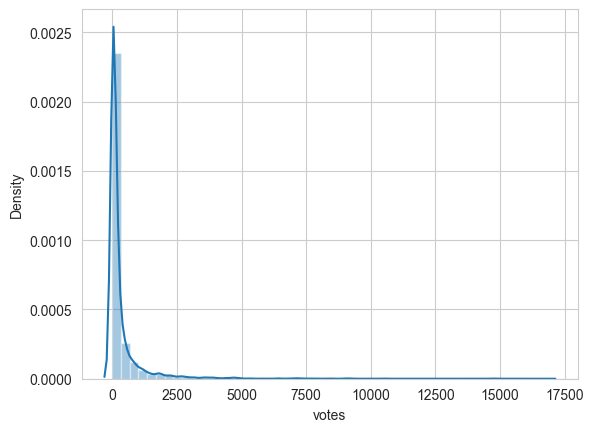

In [110]:
sns.distplot(data['votes'])
plt.show()

## Average Votes per Restaurant Ranking

In [111]:
voting_rating = data.groupby('name')[['votes']].mean().sort_values('votes',ascending=False)
voting_rating

,votes
name,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
...,...
NutriFit,0.000000
Cross Roads Inn,0.000000
Crown Resto,0.000000


## Adding 'Name' Column to Voting Rating Data

In [112]:
voting_rating['name'] = voting_rating.index

## Resetting Index and Displaying Top Records

In [113]:
voting_rating = voting_rating.reset_index(drop=True)

voting_rating.head()

,votes,name
0,16588.500000,Byg Brewski Brewing Company
1,14956.000000,Toit
2,9562.333333,The Black Pearl
3,9164.500000,Big Pitcher
4,8396.545455,Arbor Brewing Company


## Merging Voting and Rating Data with Restaurant Names

In [114]:
voting_rating = pd.merge(voting_rating,data[['rate','name']])
voting_rating

,votes,name,rate
0,16588.5,Byg Brewski Brewing Company,4.9
1,16588.5,Byg Brewski Brewing Company,4.9
2,16588.5,Byg Brewski Brewing Company,4.9
3,16588.5,Byg Brewski Brewing Company,4.9
4,16588.5,Byg Brewski Brewing Company,4.9
...,...,...,...
43937,0.0,Lazzet Lee,0.0
43938,0.0,Lazzet Lee,0.0
43939,0.0,Lazzet Lee,0.0
43940,0.0,Lazzet Lee,0.0


## Top Restaurants with High Votes

In [115]:
vote_top = voting_rating[voting_rating['votes'] > 5000]
vote_top.head()

,votes,name,rate
0,16588.5,Byg Brewski Brewing Company,4.9
1,16588.5,Byg Brewski Brewing Company,4.9
2,16588.5,Byg Brewski Brewing Company,4.9
3,16588.5,Byg Brewski Brewing Company,4.9
4,16588.5,Byg Brewski Brewing Company,4.9


## Top Restaurants by Average Rating

In [116]:
vote_top = vote_top.groupby('name')[['rate']].mean().sort_values('rate',ascending=False)
vote_top

,rate
name,
Byg Brewski Brewing Company,4.900000
The Black Pearl,4.727778
TBC Sky Lounge,4.700000
Toit,4.700000
Big Pitcher,4.650000
Brew and Barbeque - A Microbrewery Pub,4.620000
The Hole in the Wall Cafe,4.600000
Windmills Craftworks,4.600000
Truffles,4.595349


### highest Rated based on most number of votes

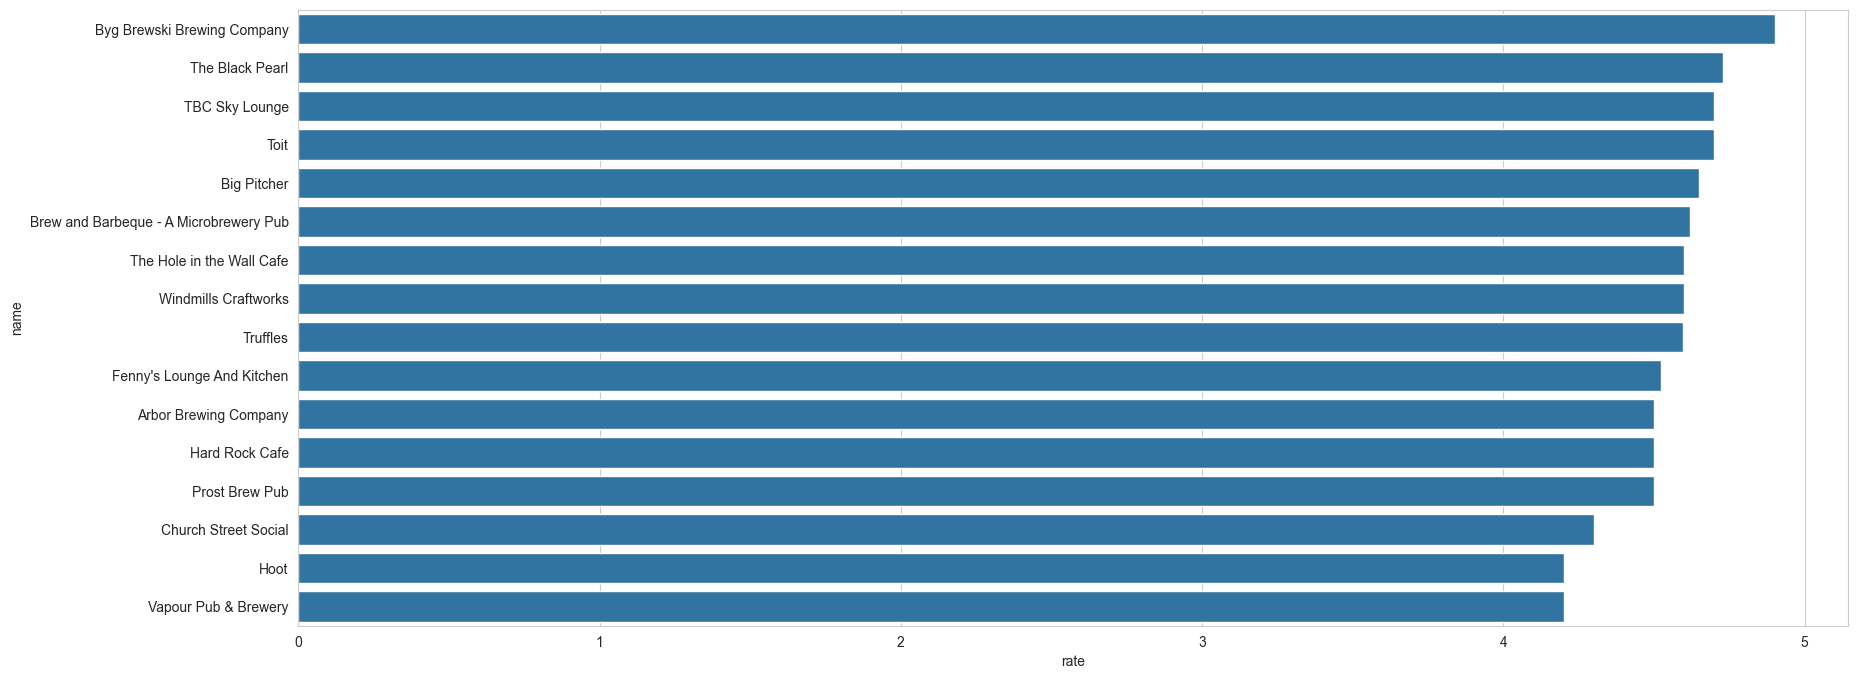

In [117]:
plt.figure(figsize=(20, 8), dpi=100)

sns.barplot(x=vote_top['rate'], y=vote_top.index, orient='h')

plt.show()

## Restaurants with Ratings Below 3

In [118]:
bad_count = voting_rating[(voting_rating['rate'] < 3) & (voting_rating['rate'] > 0)]
bad_count

,votes,name,rate
3725,967.681818,Kritunga Restaurant,2.6
3726,967.681818,Kritunga Restaurant,2.9
3727,967.681818,Kritunga Restaurant,2.9
3742,967.681818,Kritunga Restaurant,2.7
3743,967.681818,Kritunga Restaurant,2.7
...,...,...,...
42110,4.000000,Special Biriyani,2.9
42111,4.000000,Special Biriyani,2.9
42198,4.000000,Sandesh Restaurant,2.9
42311,2.500000,Kushi Meals,2.8


## Average Ratings of Restaurants with Low Ratings and Over 500 Votes

In [119]:
bad_resturants = bad_count[bad_count['votes'] > 500].groupby('name')[['rate']].mean()
bad_resturants

,rate
name,
Anjappar,2.833333
FreshMenu,2.800000
Kabab Magic,2.900000
Kritunga Restaurant,2.760000
Lakeview Milkbar,2.900000
Lazeez,2.600000
Moriz Restaurant,2.775000
Savoury Restaurant,2.900000
Smoke - The Sizzler House,2.800000


## Visualization of Low-Rated Restaurants

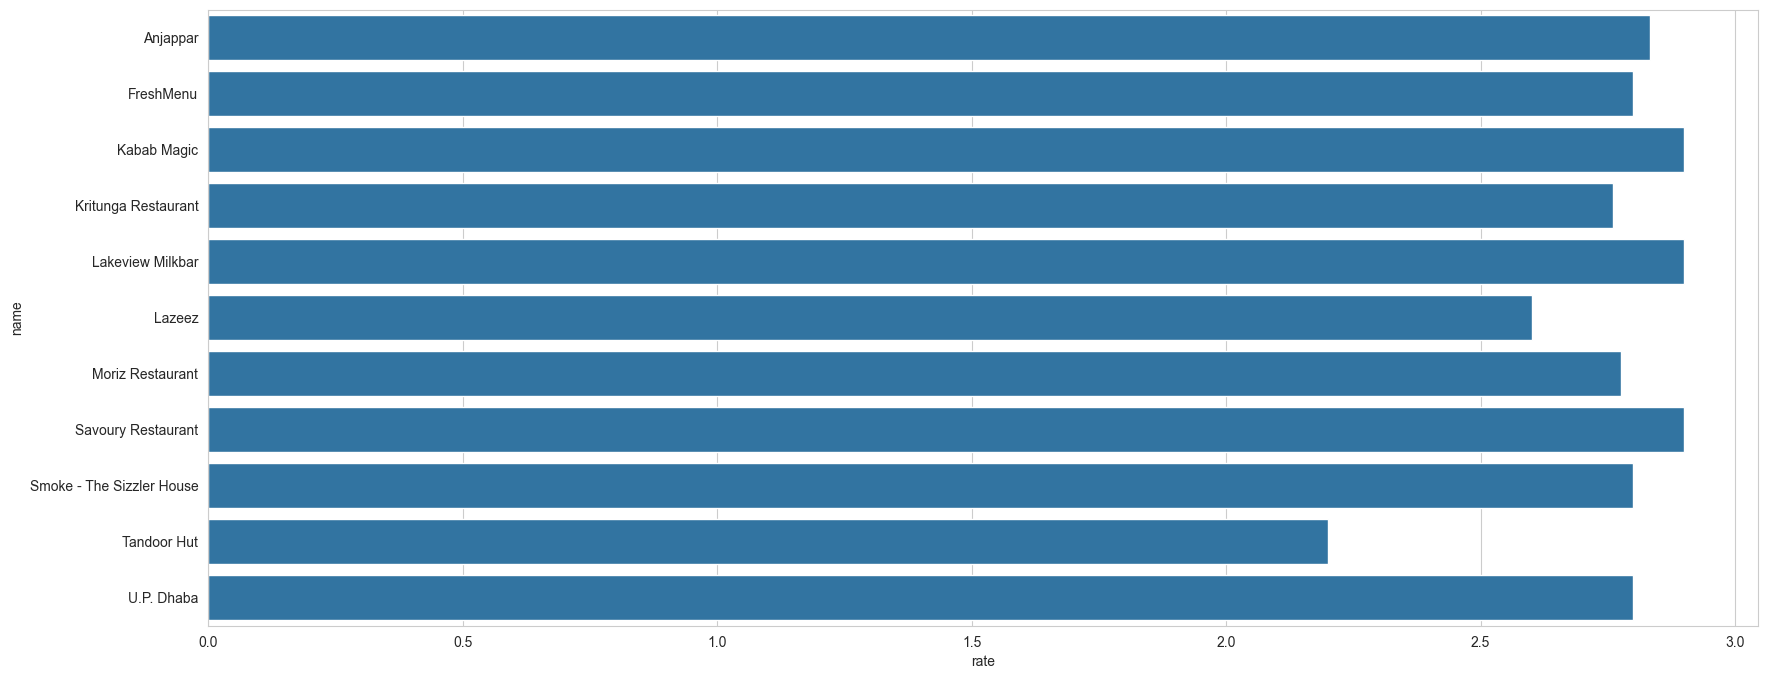

In [120]:
plt.figure(figsize=(20,8))

sns.barplot(x=bad_resturants['rate'],y=bad_resturants.index)

plt.show()

In [121]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


# location in which we have highest number of restaurants

In [122]:
location_restro = data[['location']].value_counts()[0:20]
location_restro

location             
BTM                      4261
Koramangala 5th Block    2381
HSR                      2128
Indiranagar              1936
JP Nagar                 1849
Jayanagar                1718
Whitefield               1693
Marathahalli             1503
Bannerghatta Road        1324
Koramangala 6th Block    1111
Koramangala 7th Block    1089
Brigade Road             1084
Bellandur                1078
Koramangala 1st Block     965
Electronic City           964
Sarjapur Road             919
Ulsoor                    901
Koramangala 4th Block     864
MG Road                   836
Banashankari              805
Name: count, dtype: int64

## "Count of Restaurants in Each Location

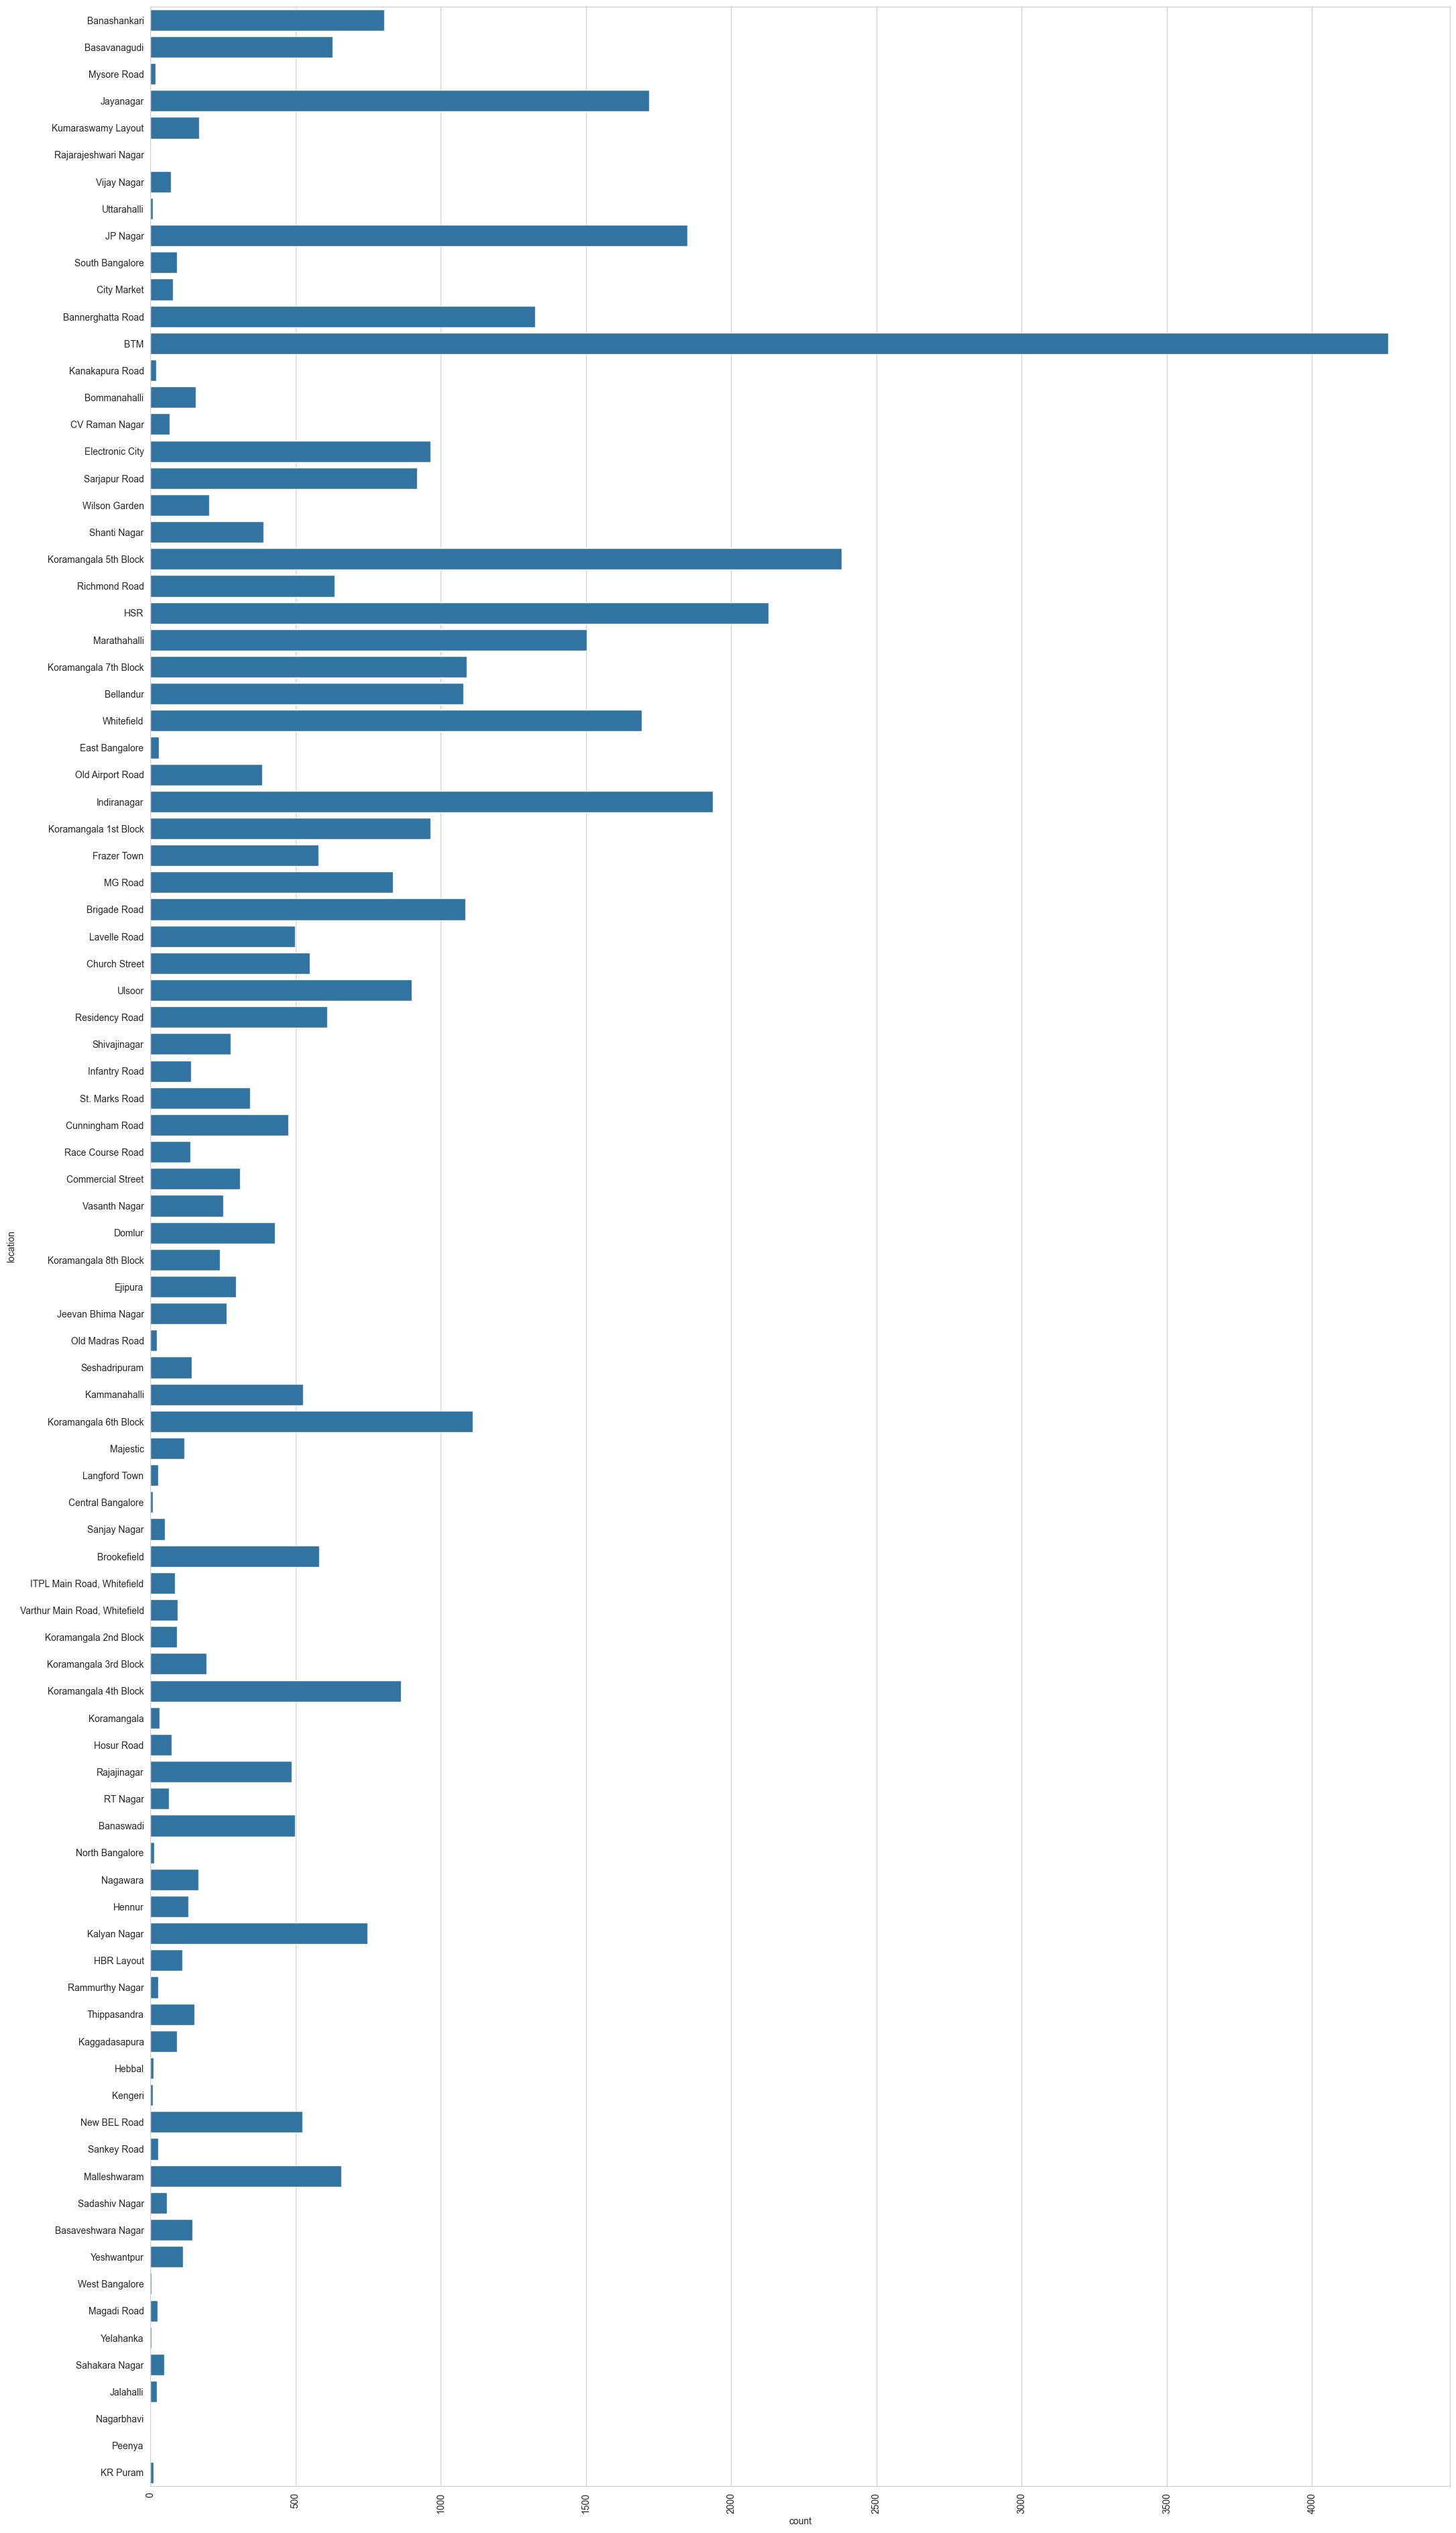

In [123]:
plt.figure(figsize=(25,48))
sns.countplot(data['location'])

plt.xticks(rotation=90)

plt.show()

#### Barplot of number of resturent in any location

In [124]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


## Restaurant Type Distribution

In [125]:
data.rest_type.value_counts()

rest_type
Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: count, Length: 87, dtype: int64

## Analysis of the Top 10 Cuisines

cuisines
North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: count, dtype: int64


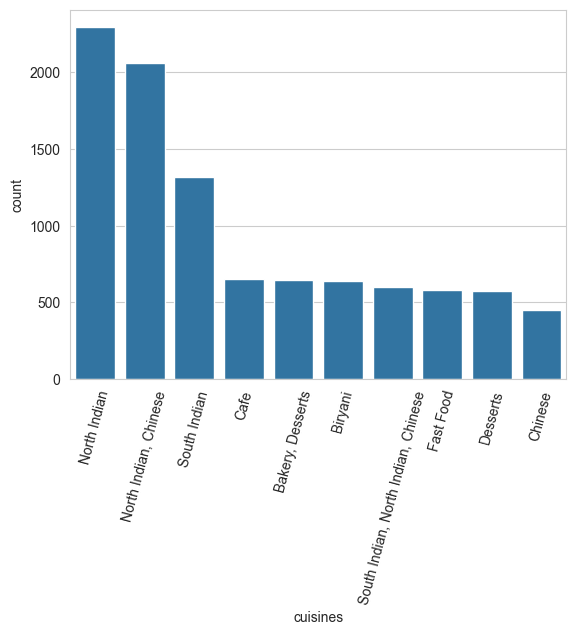

In [126]:
cusin = data.cuisines.value_counts()[0:10]
print(cusin)
sns.barplot(x=cusin.index,y=cusin)
plt.xticks(rotation=75)
plt.show()

#### Barplot of top 10 cuisines preffered by customers

### Check the distribution for cost of 2 people

In [127]:
data['approx_cost(for two people)'].isna().sum()

252

## Removing Rows with Missing Approximate Cost Data

In [128]:
data.dropna(axis=0,subset=['approx_cost(for two people)'],inplace=True)

## Approximate Cost for Two People

In [129]:
data['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 43690, dtype: object

## Processed Approximate Cost for Two People

In [130]:
data['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 43690, dtype: object

## Converting to Integer: Approximate Cost for Two People

In [131]:
# Assuming data is your DataFrame
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',', '', regex=True)
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(int)

## Processed Approximate Cost for Two People (Integer)

In [132]:
data['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 43690, dtype: int32

## Distribution of Approximate Cost for Two People

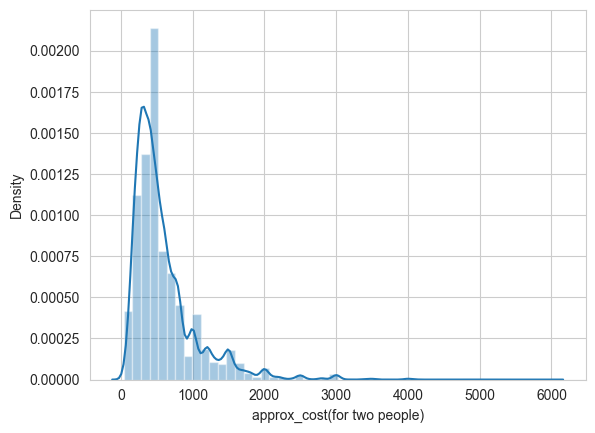

In [133]:
sns.distplot(data['approx_cost(for two people)'])



plt.show()

##  Approximate Cost for Two People

In [134]:
data['approx_cost(for two people)'].describe()

count    43690.000000
mean       594.270222
std        458.761551
min         40.000000
25%        300.000000
50%        450.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

## Analysis of High-Cost Dining Options

In [135]:
data[data['approx_cost(for two people)'] > 2000]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
3310,Beetle Juice Bar - Springs Hotel & Spa,No,Yes,3.7,64,Basavanagudi,Bar,Rooftop Ambience,Finger Food,2200,[]
3736,Beetle Juice Bar - Springs Hotel & Spa,No,Yes,3.7,64,Basavanagudi,Bar,Rooftop Ambience,Finger Food,2200,[]
4820,The Square - Novotel,No,Yes,4.3,760,Marathahalli,Fine Dining,"Breakfast Buffet, Cocktails, Sunday Brunch, No...","Continental, North Indian, Japanese, Italian",2500,"[('Rated 5.0', 'RATED\n Christmas always used..."
4861,Chez Nous - Novotel,No,Yes,3.9,125,Marathahalli,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian",2500,"[('Rated 5.0', 'RATED\n I will visit there la..."
4953,Chez Nous - Novotel,No,Yes,3.9,125,Marathahalli,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian",2500,"[('Rated 5.0', 'RATED\n I will visit there la..."
...,...,...,...,...,...,...,...,...,...,...,...
51666,Bling - The Zuri,No,No,3.7,228,Whitefield,Lounge,"Martini, Cocktails, Paneer Tikka","Continental, North Indian",2100,"[('Rated 3.0', 'RATED\n Happen to visit there..."
51681,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."
51685,Biergarten,No,Yes,4.7,7064,Whitefield,"Microbrewery, Pub","Wheat Beer, Risotto, Craft Beer, Caesar Salad,...","Continental, European, BBQ, Chinese, Asian",2400,"[('Rated 3.0', 'RATED\n We had been here on a..."
51686,Windmills Craftworks,No,No,4.6,5954,Whitefield,"Microbrewery, Pub","Keema Pav, Cocktails, Craft Beer, Pork Chops, ...","American, North Indian, Salad",2500,"[('Rated 5.0', ""RATED\n A review for Windmill..."


# Thank You 